<div style=" background-color: RGB(0,114,200);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET 4 DATA ANALYST</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Réalisez une étude de santé publique avec R ou Python
</h2>
</div>

# OBJECTIF DE CE NOTEBOOK

Bienvenue dans l'outil plébiscité par les analystes de données Jupyter.

Il s'agit d'un outil permettant de mixer et d'alterner codes, textes et graphique.

Cet outil est formidable pour plusieurs raisons:

+ il permet de tester des lignes de codes au fur et à mesure de votre rédaction, de constater immédiatement le résultat d'un instruction, de la corriger si nécessaire.
+ De rédiger du texte pour expliquer l'approche suivie ou les résultats d'une analyse et de le mettre en forme grâce à du code html ou plus simple avec **Markdown**
+ d'agrémenter de graphiques

Pour vous aider dans vos premiers pas à l'usage de Jupyter et de Python, nous avons rédigé ce notebook en vous indiquant les instructions à suivre.

Il vous suffit pour cela de saisir le code Python répondant à l'instruction donnée.

Vous verrez de temps à autre le code Python répondant à une instruction donnée mais cela est fait pour vous aider à comprendre la nature du travail qui vous est demandée.

Et garder à l'esprit, qu'il n'y a pas de solution unique pour résoudre un problème et qu'il y a autant de résolutions de problèmes que de développeurs ;)...



Note jeremy 
Est ce qu'il faut faire le calcul de la sous nutrition sur les pays qu'on a ? 
Est ce qu'il faut faire des graphiques ?
Rajouter le soja
La liste des céréales est difficile a trouver ...

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.1 - Importation des librairies</h3>
</div>

In [2]:
#Importation de la librairie Pandas
import pandas as pd
import matplotlib.pyplot as plt

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.2 - Chargement des fichiers Excel</h3>
</div>

In [1]:
#Importation du fichier population.csv
population = pd.read_csv('DAN-P4-FAO/population.csv')

#Importation du fichier dispo_alimentaire.csv
dispo_ali = pd.read_csv('DAN-P4-FAO/dispo_alimentaire.csv')

#Importation du fichier aide_alimentaire.csv
aide_ali = pd.read_csv('DAN-P4-FAO/aide_alimentaire.csv')

#Importation du fichier sous_nutrition.csv
sous_nutri = pd.read_csv('DAN-P4-FAO/sous_nutrition.csv')

NameError: name 'pd' is not defined

In [4]:
display(sous_nutri.head())
display(population.head())

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


In [5]:
population.head()

,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.1 - Analyse exploratoire du fichier population</h3>
</div>

In [6]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(population.shape[0]))
print("Le tableau comporte {} colonne(s)".format(population.shape[1]))

Le tableau comporte 1416 observation(s) ou article(s)
Le tableau comporte 3 colonne(s)


In [7]:
#Consulter le nombre de colonnes
nombre_de_colonnes = population.shape[1]
display("Nombre de colonnes:", nombre_de_colonnes)
#La nature des données dans chacune des colonnes
display("La nature des données dans chacune des colonnes",population.dtypes)
#Le nombre de valeurs présentes dans chacune des colonnes
nombre_de_valeurs = population.count()
display("Le nombre de valeurs présentes dans chacune des colonnes",nombre_de_valeurs)

'Nombre de colonnes:'

3

'La nature des données dans chacune des colonnes'

Zone       object
Année       int64
Valeur    float64
dtype: object

'Le nombre de valeurs présentes dans chacune des colonnes'

Zone      1416
Année     1416
Valeur    1416
dtype: int64

In [8]:
#Affichage les 5 premières lignes de la table
population.head()


,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


In [9]:
#Nous allons harmoniser les unités. Pour cela, nous avons décidé de multiplier la population par 1000
#Multiplication de la colonne valeur par 1000
population['Valeur']=population['Valeur']*1000
population.head()

,Zone,Année,Valeur
0,Afghanistan,2013,32269589.0
1,Afghanistan,2014,33370794.0
2,Afghanistan,2015,34413603.0
3,Afghanistan,2016,35383032.0
4,Afghanistan,2017,36296113.0


In [10]:
#changement du nom de la colonne Valeur par Population
population.rename(columns={'Valeur':'Population'},inplace=True)

In [11]:
#Affichage les 5 premières lignes de la table pour voir les modifications
population.head()

,Zone,Année,Population
0,Afghanistan,2013,32269589.0
1,Afghanistan,2014,33370794.0
2,Afghanistan,2015,34413603.0
3,Afghanistan,2016,35383032.0
4,Afghanistan,2017,36296113.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.2 - Analyse exploratoire du fichier disponibilité alimentaire</h3>
</div>

In [12]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(dispo_ali.shape[0]))
print("Le tableau comporte {} colonne(s)".format(dispo_ali.shape[1]))

Le tableau comporte 15605 observation(s) ou article(s)
Le tableau comporte 18 colonne(s)


In [13]:
#Consulter le nombre de colonnes
nombre_de_colonnes = dispo_ali.shape[1]
print("Nombre de colonnes:", nombre_de_colonnes)


Nombre de colonnes: 18


In [14]:
#Affichage les 5 premières lignes de la table
dispo_ali.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [15]:
#remplacement des NaN dans le dataset par des 0
dispo_ali.fillna(0,inplace=True)

In [16]:
#multiplication de toutes les lignes contenant des milliers de tonnes en Kg
a_convertir = ['Aliments pour animaux','Autres Utilisations','Disponibilité intérieure','Exportations - Quantité','Importations - Quantité','Nourriture','Pertes','Production','Semences','Traitement']
for c in a_convertir:
    dispo_ali[c] = dispo_ali[c] * 1000000

In [17]:
#Affichage les 5 premières lignes de la table
dispo_ali.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier aide alimentaire</h3>
</div>

In [18]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(aide_ali.shape[0]))
print("Le tableau comporte {} colonne(s)".format(aide_ali.shape[1]))

Le tableau comporte 1475 observation(s) ou article(s)
Le tableau comporte 4 colonne(s)


In [19]:
#Consulter le nombre de colonnes
nombre_de_colonnes = aide_ali.shape[1]
print("Nombre de colonnes:", nombre_de_colonnes)

Nombre de colonnes: 4


In [20]:
#Affichage les 5 premières lignes de la table
aide_ali.head()

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [21]:
#changement du nom de la colonne Pays bénéficiaire par Zone
aide_ali.rename(columns={'Pays bénéficiaire':'Zone'},inplace=True)
aide_ali.head()

,Zone,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [22]:
#Multiplication de la colonne Aide_alimentaire qui contient des tonnes par 1000 pour avoir des kg
aide_ali['Valeur'] = aide_ali['Valeur']*1000

In [23]:
#Affichage les 5 premières lignes de la table
aide_ali.head()

,Zone,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682000
1,Afghanistan,2014,Autres non-céréales,335000
2,Afghanistan,2013,Blé et Farin,39224000
3,Afghanistan,2014,Blé et Farin,15160000
4,Afghanistan,2013,Céréales,40504000


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier sous nutrition</h3>
</div>

In [24]:
#Afficher les dimensions du dataset
print("le tableau comporte {} observation (s) ou articles".format(sous_nutri.shape[0]))
print("Le tableau comporte{} observation (s)".format(sous_nutri.shape[1]))

le tableau comporte 1218 observation (s) ou articles
Le tableau comporte3 observation (s)


In [25]:
#Consulter le nombre de colonnes
nombre_de_colonnes = sous_nutri.shape[1]

In [26]:
display("Nombre de colonnes est de :", nombre_de_colonnes)

'Nombre de colonnes est de :'

3

In [27]:
#Afficher les 5 premières lignes de la table
display(sous_nutri.head())

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [28]:
#Conversion de la colonne sous nutrition en numérique
sous_nutri['Valeur'] = pd.to_numeric(sous_nutri['Valeur'], errors='coerce')
sous_nutri.dtypes
sous_nutri.head()

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [29]:
#Conversion de la colonne (avec l'argument errors=coerce qui permet de convertir automatiquement les lignes qui ne sont pas des nombres en NaN)
#Puis remplacement des NaN en 0
sous_nutri.fillna(0,inplace=True)
print(sous_nutri.head)

<bound method NDFrame.head of              Zone      Année  Valeur
0     Afghanistan  2012-2014     8.6
1     Afghanistan  2013-2015     8.8
2     Afghanistan  2014-2016     8.9
3     Afghanistan  2015-2017     9.7
4     Afghanistan  2016-2018    10.5
...           ...        ...     ...
1213     Zimbabwe  2013-2015     0.0
1214     Zimbabwe  2014-2016     0.0
1215     Zimbabwe  2015-2017     0.0
1216     Zimbabwe  2016-2018     0.0
1217     Zimbabwe  2017-2019     0.0

[1218 rows x 3 columns]>


In [30]:
#changement du nom de la colonne Valeur par sous_nutrition
sous_nutri.rename(columns={'Valeur':'sous_nutrition'},inplace=True)
display(sous_nutri)

,Zone,Année,sous_nutrition
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5
...,...,...,...
1213,Zimbabwe,2013-2015,0.0
1214,Zimbabwe,2014-2016,0.0
1215,Zimbabwe,2015-2017,0.0
1216,Zimbabwe,2016-2018,0.0


In [31]:
#Multiplication de la colonne sous_nutrition par 1000000
sous_nutri['sous_nutrition'] = sous_nutri['sous_nutrition']*1000000

In [32]:
#Afficher les 5 premières lignes de la table
sous_nutri.head()

,Zone,Année,sous_nutrition
0,Afghanistan,2012-2014,8600000.0
1,Afghanistan,2013-2015,8800000.0
2,Afghanistan,2014-2016,8900000.0
3,Afghanistan,2015-2017,9700000.0
4,Afghanistan,2016-2018,10500000.0


In [33]:
### Correction de la colonne année
sous_nutri['Année']=sous_nutri['Année'].apply(lambda x: int(x.split('-')[0])+1)

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.1 - Proportion de personnes en sous nutrition</h3>
</div>

In [34]:
# Il faut tout d'abord faire une jointure entre la table population et la table sous nutrition, en ciblant l'année 2017
sous_nutrition_2017 = sous_nutri[sous_nutri['Année']==2017][['Zone', 'sous_nutrition']]
population_2017 = population[population['Année'] == 2017]
colonne_commune = 'Zone'
joint_pop_sousnut = pd.merge(left=population_2017, right=sous_nutrition_2017, on=colonne_commune, how="inner")
joint_pop_sousnut

,Zone,Année,Population,sous_nutrition
0,Afghanistan,2017,36296113.0,10500000.0
1,Afrique du Sud,2017,57009756.0,3100000.0
2,Albanie,2017,2884169.0,100000.0
3,Algérie,2017,41389189.0,1300000.0
4,Allemagne,2017,82658409.0,0.0
...,...,...,...,...
198,Venezuela (République bolivarienne du),2017,29402484.0,8000000.0
199,Viet Nam,2017,94600648.0,6500000.0
200,Yémen,2017,27834819.0,0.0
201,Zambie,2017,16853599.0,0.0


In [35]:
pays_avec_plus_forte_etat_sous_nutrition=joint_pop_sousnut[["Zone", "Population", "sous_nutrition"]]
pays_avec_plus_forte_etat_sous_nutrition["proportion"]=round(pays_avec_plus_forte_etat_sous_nutrition["sous_nutrition"] / pays_avec_plus_forte_etat_sous_nutrition["Population"] * 100, 2)
top10=pays_avec_plus_forte_etat_sous_nutrition[["Zone", "proportion"]].sort_values(by="proportion", ascending=False).head(10)

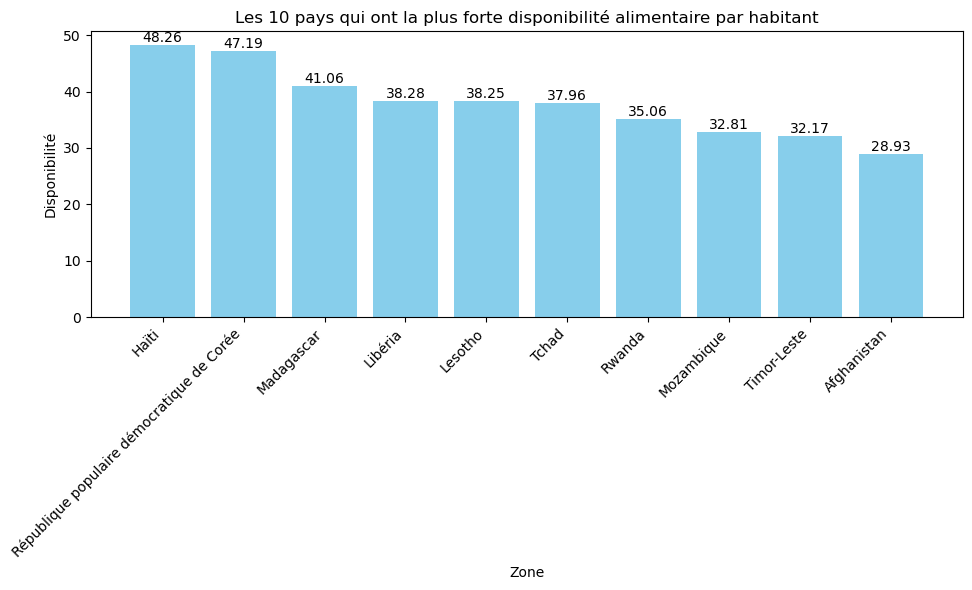

In [36]:
# Créer un diagramme à barres pour la colonne Zone et la colonne Proportion
plt.figure(figsize=(10, 6))  # Définir la taille du graphique
plt.bar(top10['Zone'], top10['proportion'], color='skyblue')  # Créer le diagramme à barres
plt.xlabel('Zone')  # Ajouter une étiquette à l'axe des x
plt.ylabel('Disponibilité')  # Ajouter une étiquette à l'axe des y
plt.title('Les 10 pays qui ont la plus forte disponibilité alimentaire par habitant')  # Ajouter un titre au graphique
plt.xticks(rotation=45, ha='right')  # Rotation des étiquettes de l'axe des x pour une meilleure lisibilité
plt.tight_layout()  # Ajuster la mise en page pour éviter la superposition des étiquettes
# Ajouter les valeurs de proportion au-dessus de chaque barre
for i, proportion in enumerate(top10['proportion']):
    plt.text(i, proportion, str(proportion), ha='center', va='bottom')
plt.savefig('top10_dispo.png')
plt.show()  # Afficher le graphique

In [37]:
#Affichage du dataset
joint_pop_sousnut

,Zone,Année,Population,sous_nutrition
0,Afghanistan,2017,36296113.0,10500000.0
1,Afrique du Sud,2017,57009756.0,3100000.0
2,Albanie,2017,2884169.0,100000.0
3,Algérie,2017,41389189.0,1300000.0
4,Allemagne,2017,82658409.0,0.0
...,...,...,...,...
198,Venezuela (République bolivarienne du),2017,29402484.0,8000000.0
199,Viet Nam,2017,94600648.0,6500000.0
200,Yémen,2017,27834819.0,0.0
201,Zambie,2017,16853599.0,0.0


In [38]:
#Calcul et affichage du nombre de personnes en état de sous nutrition
print('Le nombre de personne en état de sous nutrition est :', joint_pop_sousnut['sous_nutrition'].sum())
# La proportion de personne en etat de sous nutrition
proport_sousnut = round(joint_pop_sousnut['sous_nutrition'].sum() / joint_pop_sousnut['Population'].sum() * 100,2)
print(f'la proportion de personne en etat de sous nutrition est de : {proport_sousnut}%')

Le nombre de personne en état de sous nutrition est : 535700000.0
la proportion de personne en etat de sous nutrition est de : 7.1%


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.2 - Nombre théorique de personne qui pourrait être nourries</h3>
</div>

In [39]:
#Combien mange en moyenne un être humain ? Source =>


In [40]:
#On commence par faire une jointure entre le data frame population et Dispo_alimentaire afin d'ajouter dans ce dernier la population
df_pop_dispoali = pd.merge(population_2017, dispo_ali, on='Zone', how='inner')

In [41]:
#Affichage du nouveau dataframe
df_pop_dispoali.head()

,Zone,Année,Population,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,2017,36296113.0,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0
1,Afghanistan,2017,36296113.0,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0
2,Afghanistan,2017,36296113.0,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,2017,36296113.0,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,2017,36296113.0,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0


In [42]:
#Création de la colonne dispo_kcal avec calcul des kcal disponibles mondialement
df_pop_dispoali['dispo_kcal'] = df_pop_dispoali['Disponibilité alimentaire (Kcal/personne/jour)'] * df_pop_dispoali['Population'] * 365
print(f" la disponibilité totale en kcal est de : {df_pop_dispoali['dispo_kcal'].sum()} kcal")

 la disponibilité totale en kcal est de : 7635429388975815.0 kcal


In [43]:
#Calcul du nombre d'humains pouvant être nourris
nbre_pers_a_nourir = df_pop_dispoali['dispo_kcal'].sum() / (2500 * 365)
print(f'Le nombre de personne pouvant être nourri est de : {nbre_pers_a_nourir}')

Le nombre de personne pouvant être nourri est de : 8367593850.9324


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.3 - Nombre théorique de personne qui pourrait être nourrie avec les produits végétaux</h3>
</div>

In [44]:
#Transfert des données avec les végétaux dans un nouveau dataframe
df_vegetaux = df_pop_dispoali[df_pop_dispoali['Origine'] == 'vegetale']

In [45]:
#Calcul du nombre de kcal disponible pour les végétaux
nombre_kcal_vegetaux_dispo = df_vegetaux['dispo_kcal'].sum()
print(f" la disponibilité totale en kcal pour les végétaux est de : {nombre_kcal_vegetaux_dispo} kcal")

 la disponibilité totale en kcal pour les végétaux est de : 6300178937197865.0 kcal


In [46]:
#Calcul du nombre d'humains pouvant être nourris avec les végétaux
nbre_humains_nourris_avec_vegetaux = nombre_kcal_vegetaux_dispo / 2500 * 365
print(f" le nombre d'humains pouvant être nourris avec les végétaux est de : {nbre_humains_nourris_avec_vegetaux} kcal")

 le nombre d'humains pouvant être nourris avec les végétaux est de : 919826124830888.2 kcal


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.4 - Utilisation de la disponibilité intérieure</h3>
</div>

In [47]:
#Calcul de la disponibilité totale
dispo_inter_totale = df_pop_dispoali['Disponibilité intérieure'].sum()
print(f" la disponibilité interieure totale est de : {dispo_inter_totale}")

 la disponibilité interieure totale est de : 9733927000000.0


In [48]:
#création d'une boucle for pour afficher les différentes valeurs en fonction des colonnes aliments pour animaux, pertes, nourritures, 
colonnes_a_afficher = ['Aliments pour animaux', 'Pertes', 'Nourriture']

for col in colonnes_a_afficher :
    print(f" La proportion de {col} est de {round(df_pop_dispoali[col].sum()/dispo_inter_totale*100,2)} %")

 La proportion de Aliments pour animaux est de 13.23 %
 La proportion de Pertes est de 4.65 %
 La proportion de Nourriture est de 49.37 %


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.5 - Utilisation des céréales</h3>
</div>

In [49]:
#Création d'une liste avec toutes les variables
df_pop_dispoali['Produit'].unique()

array(['Abats Comestible', 'Agrumes, Autres', 'Aliments pour enfants',
       'Ananas', 'Bananes', 'Beurre, Ghee', 'Bière', 'Blé',
       'Boissons Alcooliques', 'Café', 'Coco (Incl Coprah)', 'Crème',
       'Céréales, Autres', 'Dattes', 'Edulcorants Autres',
       'Feve de Cacao', 'Fruits, Autres', 'Graines de coton',
       'Graines de tournesol', 'Graisses Animales Crue',
       'Huil Plantes Oleif Autr', 'Huile Graines de Coton',
       "Huile d'Arachide", "Huile d'Olive", 'Huile de Colza&Moutarde',
       'Huile de Palme', 'Huile de Soja', 'Huile de Sésame',
       'Huile de Tournesol', 'Lait - Excl Beurre', 'Légumes, Autres',
       'Légumineuses Autres', 'Maïs', 'Miel', 'Millet', 'Miscellanees',
       'Noix', 'Oeufs', 'Olives', 'Oranges, Mandarines', 'Orge',
       'Plantes Oleiferes, Autre', 'Poissons Eau Douce', 'Poivre',
       'Pommes', 'Pommes de Terre', 'Raisin', 'Riz (Eq Blanchi)',
       'Sucre Eq Brut', 'Sucre, betterave', 'Sucre, canne', 'Sésame',
       'Thé', 'Toma

In [50]:
liste_céréale = ['Blé', 'Céréales, Autres', 'Maïs', 'Millet', 'Riz (Eq Blanchi)', 'Orge', 'Sorgho', 'Seigle', 'Avoine']

In [51]:
#Création d'un dataframe avec les informations uniquement pour ces céréales
df_cereales = df_pop_dispoali.loc[df_pop_dispoali['Produit'].isin(liste_céréale)]

In [52]:
#Affichage de la proportion d'alimentation animale
propor_alim_animal = round(df_cereales['Aliments pour animaux'].sum() / df_cereales['Disponibilité intérieure'].sum() * 100, 2)
print(f' la proportion alimentation animale est de : {propor_alim_animal}%')

 la proportion alimentation animale est de : 36.14%


In [53]:
#Affichage de la proportion d'alimentation humaine
propor_alim_humaine = round(df_cereales['Nourriture'].sum() / df_cereales['Disponibilité intérieure'].sum() * 100, 2)
print(f' la proportion alimentation humaine est de : {propor_alim_humaine}%')

 la proportion alimentation humaine est de : 42.91%


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.6 - Pays avec la proportion de personnes sous-alimentée la plus forte en 2017</h3>
</div>

In [54]:
#Création de la colonne proportion par pays
joint_pop_sousnut['proportion'] = joint_pop_sousnut['sous_nutrition'] / joint_pop_sousnut['Population']
joint_pop_sousnut_2017 = joint_pop_sousnut[joint_pop_sousnut['Année'] == 2017]
joint_pop_sousnut_2017[["Zone", "proportion"]].sort_values(by="proportion", ascending=False).head(10)

,Zone,proportion
78,Haïti,0.482592
157,République populaire démocratique de Corée,0.471887
108,Madagascar,0.410629
103,Libéria,0.382797
100,Lesotho,0.382494
183,Tchad,0.379576
161,Rwanda,0.350556
121,Mozambique,0.328109
186,Timor-Leste,0.321735
0,Afghanistan,0.289287


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.7 - Pays qui ont le plus bénéficié d'aide alimentaire depuis 2013</h3>
</div>

In [55]:
#calcul du total de l'aide alimentaire par pays
aide_ali_par_pays = aide_ali[["Zone", "Valeur"]].groupby(['Zone']).sum()

In [56]:
#affichage après trie des 10 pays qui ont bénéficié le plus de l'aide alimentaire
aide_ali_par_pays.sort_values(by='Valeur', ascending=False).head(10)

,Valeur
Zone,
République arabe syrienne,1858943000
Éthiopie,1381294000
Yémen,1206484000
Soudan du Sud,695248000
Soudan,669784000
Kenya,552836000
Bangladesh,348188000
Somalie,292678000
République démocratique du Congo,288502000


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.8 - Evolution des 5 pays qui ont le plus bénéficiés de l'aide alimentaire entre 2013 et 2016</h3>
</div>

In [57]:
#Création d'un dataframe avec la zone, l'année et l'aide alimentaire puis groupby sur zone et année 
# les données pour les années 2013 à 2016
df_filtered = aide_ali[(aide_ali['Année'] >= 2013) & (aide_ali['Année'] <= 2016)]
# Créer un DataFrame avec les colonnes "zone", "année" et "aide_alimentaire"
df_aide_ali_2013_2016 = df_filtered[['Zone', 'Année', 'Valeur']]

# Groupby sur zone et année et calculer la somme de l'aide alimentaire
df_grouped = df_aide_ali_2013_2016.groupby(['Zone', 'Année']).sum()

In [58]:
#Création d'une liste contenant les 10 pays qui ont le plus bénéficiées de l'aide alimentaire
pays_qui_ont_beneficier_le_plus_daide_alim = df_grouped.groupby(['Zone']).sum(['Valeur'])
liste_5_pays = pays_qui_ont_beneficier_le_plus_daide_alim.sort_values(by='Valeur', ascending=False).reset_index().head(5)
liste_10_pays = pays_qui_ont_beneficier_le_plus_daide_alim.sort_values(by='Valeur', ascending=False).reset_index().head(10)

In [59]:
#Les 5 pays qui ont le plus bénéficiés de l'aide alimentaire entre 2013 et 2016
evolution_top_05=aide_ali[aide_ali['Zone'].isin(liste_5_pays['Zone'])][['Zone', 'Année', 'Valeur']].groupby(['Zone', 'Année']).sum()
evolution_top_05

Valeur
Zone                      Année           
République arabe syrienne 2013   563566000
                          2014   651870000
                          2015   524949000
                          2016   118558000
Soudan                    2013   330230000
                          2014   321904000
                          2015    17650000
Soudan du Sud             2013   196330000
                          2014   450610000
                          2015    48308000
Yémen                     2013   264764000
                          2014   103840000
                          2015   372306000
                          2016   465574000
Éthiopie                  2013   591404000
                          2014   586624000
                          2015   203266000

In [60]:
#On filtre sur le dataframe avec notre liste
liste_10_pays

,Zone,Valeur
0,République arabe syrienne,1858943000
1,Éthiopie,1381294000
2,Yémen,1206484000
3,Soudan du Sud,695248000
4,Soudan,669784000
5,Kenya,552836000
6,Bangladesh,348188000
7,Somalie,292678000
8,République démocratique du Congo,288502000
9,Niger,276344000


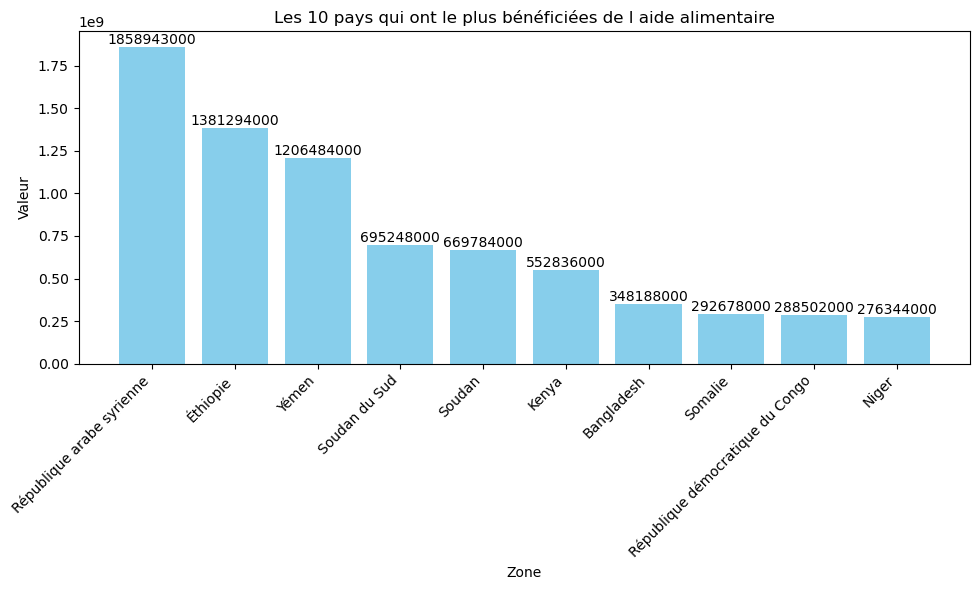

In [61]:
plt.figure(figsize=(10, 6))  # Définir la taille du graphique
plt.bar(liste_10_pays['Zone'], liste_10_pays['Valeur'], color='skyblue')  # Créer le diagramme à barres
plt.xlabel('Zone')  # Ajouter une étiquette à l'axe des x
plt.ylabel('Valeur')  # Ajouter une étiquette à l'axe des y
plt.title('Les 10 pays qui ont le plus bénéficiées de l aide alimentaire')  # Ajouter un titre au graphique
plt.xticks(rotation=45, ha='right')  # Rotation des étiquettes de l'axe des x pour une meilleure lisibilité
plt.tight_layout()  # Ajuster la mise en page pour éviter la superposition des étiquettes
# Ajouter les valeurs de proportion au-dessus de chaque barre
for i, proportion in enumerate(liste_10_pays['Valeur']):
    plt.text(i, proportion, str(proportion), ha='center', va='bottom')
plt.savefig('liste_10_pays.png')
plt.show()  # Afficher le graphique

In [62]:
# Affichage des pays avec l'aide alimentaire par année
display(df_grouped)

Valeur
Zone        Année           
Afghanistan 2013   128238000
            2014    57214000
Algérie     2013    35234000
            2014    18980000
            2015    17424000
...                      ...
Égypte      2013     1122000
Équateur    2013     1362000
Éthiopie    2013   591404000
            2014   586624000
            2015   203266000

[228 rows x 1 columns]

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.9 - Pays avec le moins de disponibilité par habitant</h3>
</div>

In [63]:
#Affichage des 10 pays qui ont le moins de dispo alimentaire par personne
dispo_pays = dispo_ali[['Zone', 'Disponibilité alimentaire (Kcal/personne/jour)']].groupby('Zone').sum()
pays_qui_ont_le_moins_dispo=dispo_pays.sort_values(by='Disponibilité alimentaire (Kcal/personne/jour)')
pays_qui_ont_le_moins_dispo.head(10)

,Disponibilité alimentaire (Kcal/personne/jour)
Zone,
République centrafricaine,1879.0
Zambie,1924.0
Madagascar,2056.0
Afghanistan,2087.0
Haïti,2089.0
République populaire démocratique de Corée,2093.0
Tchad,2109.0
Zimbabwe,2113.0
Ouganda,2126.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.10 - Pays avec le plus de disponibilité par habitant</h3>
</div>

In [64]:
#Affichage des 10 pays qui ont le plus de dispo alimentaire par personne 
pays_qui_ont_le_plus_dispo=dispo_pays.sort_values(by='Disponibilité alimentaire (Kcal/personne/jour)', ascending=False)
pays_qui_ont_le_plus_dispo.head(10)

,Disponibilité alimentaire (Kcal/personne/jour)
Zone,
Autriche,3770.0
Belgique,3737.0
Turquie,3708.0
États-Unis d'Amérique,3682.0
Israël,3610.0
Irlande,3602.0
Italie,3578.0
Luxembourg,3540.0
Égypte,3518.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.11 - Exemple de la Thaïlande pour le Manioc</h3>
</div>

In [65]:
#création d'un dataframe avec uniquement la Thaïlande 
df_zone_thailande = df_pop_dispoali[df_pop_dispoali['Zone'] == 'Thaïlande']
# df_zone_thailande.head()

In [66]:
#Calcul de la sous nutrition en Thaïlande
colonne_commune = 'Zone'
sous_nutrition_thailande = pd.merge(left=df_pop_dispoali, right=sous_nutri, on=colonne_commune, how="inner")
print('Le nombre de personne en état de sous nutrition en thaïlande est :', sous_nutrition_thailande['sous_nutrition'].sum())
print(f"soit : {round(sous_nutrition_thailande['sous_nutrition'].sum() / sous_nutrition_thailande['Population'].sum() * 100, 2)} %")

Le nombre de personne en état de sous nutrition en thaïlande est : 293978800000.0
soit : 7.15 %


In [67]:
manioc_thailande = df_zone_thailande[df_zone_thailande['Produit']=='Manioc']
colonne_manioc=manioc_thailande[['Zone', 'Produit', 'Exportations - Quantité', 'Production', 'Disponibilité alimentaire (Kcal/personne/jour)']]
manioc_thailande_filtre=colonne_manioc
manioc_thailande_filtre

,Zone,Produit,Exportations - Quantité,Production,Disponibilité alimentaire (Kcal/personne/jour)
14166,Thaïlande,Manioc,2.521400e+10,3.022800e+10,40.0


In [68]:
print('La disponibilité par habitant pour la Thaïlande :', manioc_thailande_filtre['Disponibilité alimentaire (Kcal/personne/jour)'].sum())

La disponibilité par habitant pour la Thaïlande : 40.0


In [69]:
# On calcule la proportion exportée en fonction de la proportion
exportation_manioc = manioc_thailande['Exportations - Quantité'].iloc[0] / manioc_thailande['Production'].iloc[0] * 100
print(f"La proportion de l'exportationde manioc est de : {round(exportation_manioc, 2)} %")

La proportion de l'exportationde manioc est de : 83.41 %


<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 6 - Analyse complémentaires</h2>
</div>

In [70]:
#Rajouter en dessous toutes les analyses complémtaires suite à la demande de mélanie :
#"et toutes les infos que tu trouverais utiles pour mettre en relief les pays qui semblent être 
#le plus en difficulté au niveau alimentaire"

In [80]:
#Les pays pour lesquels la proportion de personnes sous-alimentées est la plus forte en 2017 ?

#Les pays qui ont le plus bénéficié d’aide alimentaire depuis 2013 ?

#Les pays ayant le plus de disponibilité par habitant ?

#Les pays ayant le moins de disponibilité par habitant ?

#Les pays ayant la plus grande production ?


### Question 1 Les pays pour lesquels la proportion de personnes sous-alimentées est la plus forte en 2017 ?

In [81]:
joint_pop_sousnut_2017[["Zone", "proportion"]].sort_values(by="proportion", ascending=False).head(10)

,Zone,proportion
78,Haïti,0.482592
157,République populaire démocratique de Corée,0.471887
108,Madagascar,0.410629
103,Libéria,0.382797
100,Lesotho,0.382494
183,Tchad,0.379576
161,Rwanda,0.350556
121,Mozambique,0.328109
186,Timor-Leste,0.321735
0,Afghanistan,0.289287


### Question 2 Les pays qui ont le plus bénéficié d’aide alimentaire depuis 2013 ?

In [73]:
aide_ali_par_pays.sort_values(by='Valeur', ascending=False).head(10)

,Valeur
Zone,
République arabe syrienne,1858943000
Éthiopie,1381294000
Yémen,1206484000
Soudan du Sud,695248000
Soudan,669784000
Kenya,552836000
Bangladesh,348188000
Somalie,292678000
République démocratique du Congo,288502000


### Question 3 Les pays ayant le plus de disponibilité par habitant.

In [74]:
pays_qui_ont_le_plus_dispo.head(10)

,Disponibilité alimentaire (Kcal/personne/jour)
Zone,
Autriche,3770.0
Belgique,3737.0
Turquie,3708.0
États-Unis d'Amérique,3682.0
Israël,3610.0
Irlande,3602.0
Italie,3578.0
Luxembourg,3540.0
Égypte,3518.0


### Question 4 Les pays ayant le moins de disponibilité par habitant.

In [75]:
pays_qui_ont_le_moins_dispo.head(10)

,Disponibilité alimentaire (Kcal/personne/jour)
Zone,
République centrafricaine,1879.0
Zambie,1924.0
Madagascar,2056.0
Afghanistan,2087.0
Haïti,2089.0
République populaire démocratique de Corée,2093.0
Tchad,2109.0
Zimbabwe,2113.0
Ouganda,2126.0


### Question 5 Les pays ayant la plus grande production

In [76]:
colonne_pays_ayant_la_plus_grande_production=dispo_ali[['Zone', 'Production']].groupby('Zone').sum()
pays_ayant_la_plus_grande_production = colonne_pays_ayant_la_plus_grande_production.sort_values(by='Production', ascending=False)
pays_ayant_la_plus_grande_production.head()

,Production
Zone,
"Chine, continentale",1.930913e+12
Brésil,1.143605e+12
Inde,1.126270e+12
États-Unis d'Amérique,8.946680e+11
Fédération de Russie,2.632960e+11
